In [1]:
%matplotlib inline

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle
import tensorflow as tf
import numpy as np 
import PhyAct as pha

In [3]:
##load data############################################################################################################
Xtest = np.matrix(np.loadtxt("../post/testdata1/Car_test_X5.csv",delimiter=',', dtype=np.float64));
Ytest = np.matrix(np.loadtxt("../post/testdata1/Car_test_Y5.csv",delimiter=',', dtype=np.float64));
#######################################################################################################################

In [4]:
##trure data###########################################################################################################
ti = 950 ##testing point
tLen = 300  ##testing length
Ycom = np.transpose(Ytest[(ti):(ti+tLen),:])
#######################################################################################################################

In [5]:
##testng data##########################################################################################################
t = np.arange(tLen)
t = np.reshape(t,(1,tLen))

t = t + ti

Y1_com = Ycom[0,:].flatten()
Y2_com = Ycom[1,:].flatten()
Y3_com = Ycom[2,:].flatten()
Y4_com = Ycom[3,:].flatten()
Y5_com = Ycom[4,:].flatten()
Y6_com = Ycom[5,:].flatten()

t = t.flatten()
Y1_com = (np.asarray(Y1_com)).flatten()
Y2_com = (np.asarray(Y2_com)).flatten()
Y3_com = (np.asarray(Y3_com)).flatten()
Y4_com = (np.asarray(Y4_com)).flatten()
Y5_com = (np.asarray(Y5_com)).flatten()
Y6_com = (np.asarray(Y6_com)).flatten()
########################################################################################################################################### 

In [6]:
##Emd-Phy-Cas############################################################################################################
pVV = np.loadtxt("../post/koop/y_prediction_300.csv",delimiter=',', dtype=np.float64);
pVV = pVV.transpose()

In [7]:
print(pVV.shape)

(6, 1500)


In [8]:
zz1 = 0
zz = 300 + zz1

dkY1 = pVV[0]
dkY1 = dkY1[zz1:zz]

dkY2 = pVV[1]
dkY2 = dkY2[zz1:zz]

dkY3 = pVV[2]
dkY3 = dkY3[zz1:zz]

dkY4 = pVV[3]
dkY4 = dkY4[zz1:zz]

dkY5 = pVV[4]
dkY5 = dkY5[zz1:zz]

dkY6 = pVV[5]
dkY6 = dkY6[zz1:zz]


In [9]:
##Emd-Phy-Cas############################################################################################################
VVcY1 = np.loadtxt("../post/vvcx1.csv",delimiter=',', dtype=np.float64);
VVcY2 = np.loadtxt("../post/vvcx2.csv",delimiter=',', dtype=np.float64);
VVcY3 = np.loadtxt("../post/vvcx3.csv",delimiter=',', dtype=np.float64);
VVcY4 = np.loadtxt("../post/vvcv1.csv",delimiter=',', dtype=np.float64);
VVcY5 = np.loadtxt("../post/vvcv2.csv",delimiter=',', dtype=np.float64);
VVcY6 = np.loadtxt("../post/vvcv3.csv",delimiter=',', dtype=np.float64);
##

In [10]:
##Non-Phy-Cas############################################################################################################
VVaY1 = np.loadtxt("../post/vvax1.csv",delimiter=',', dtype=np.float64);
VVaY2 = np.loadtxt("../post/vvax2.csv",delimiter=',', dtype=np.float64);
VVaY3 = np.loadtxt("../post/vvax3.csv",delimiter=',', dtype=np.float64);
VVaY4 = np.loadtxt("../post/vvav1.csv",delimiter=',', dtype=np.float64);
VVaY5 = np.loadtxt("../post/vvav2.csv",delimiter=',', dtype=np.float64);
VVaY6 = np.loadtxt("../post/vvav3.csv",delimiter=',', dtype=np.float64);
##

In [11]:
##Emd-Phy-Sin############################################################################################################
VVdY1 = np.loadtxt("../post/vvdx1.csv",delimiter=',', dtype=np.float64);
VVdY2 = np.loadtxt("../post/vvdx2.csv",delimiter=',', dtype=np.float64);
VVdY3 = np.loadtxt("../post/vvdx3.csv",delimiter=',', dtype=np.float64);
VVdY4 = np.loadtxt("../post/vvdv1.csv",delimiter=',', dtype=np.float64);
VVdY5 = np.loadtxt("../post/vvdv2.csv",delimiter=',', dtype=np.float64);
VVdY6 = np.loadtxt("../post/vvdv3.csv",delimiter=',', dtype=np.float64);
##

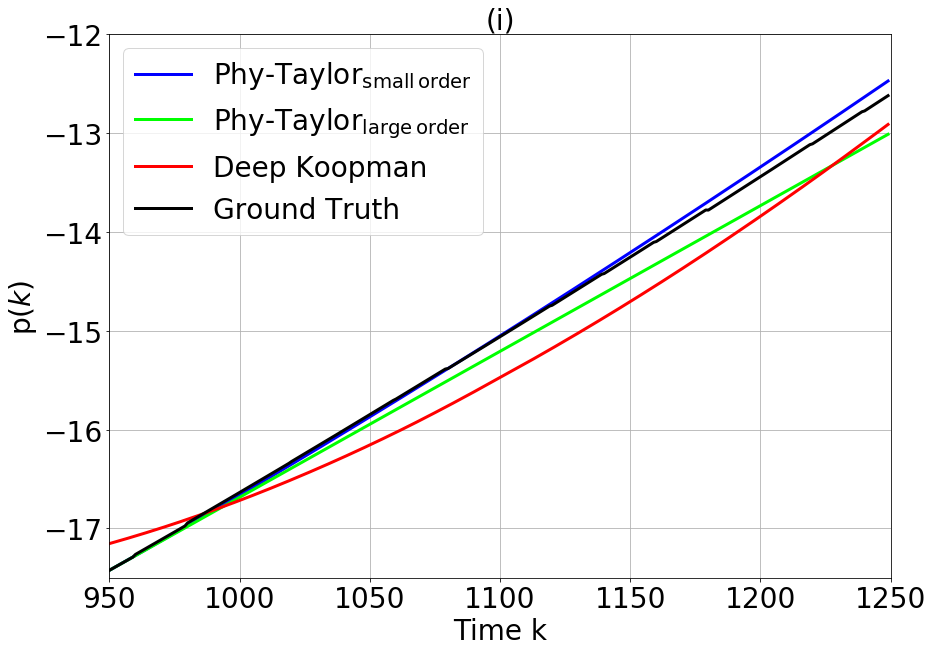

In [35]:
plt.figure(figsize= (14, 10))
plt.plot(t, VVcY1, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{small \, order}}$', color='blue')
plt.plot(t, VVdY1, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{large \, order}}$', color='lime')
plt.plot(t, dkY1, linewidth=3, label = "Deep Koopman", color='red')
plt.plot(t, Y1_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=28)
plt.ylabel(r'$\mathrm{p}(k)$', fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.title("(i)", fontsize=28)
plt.legend()
plt.rc('legend',fontsize=28) 
plt.grid()
plt.xlim([950, 1250])
plt.ylim([-17.5, -12])
plt.savefig('om1.pdf')  
plt.show()


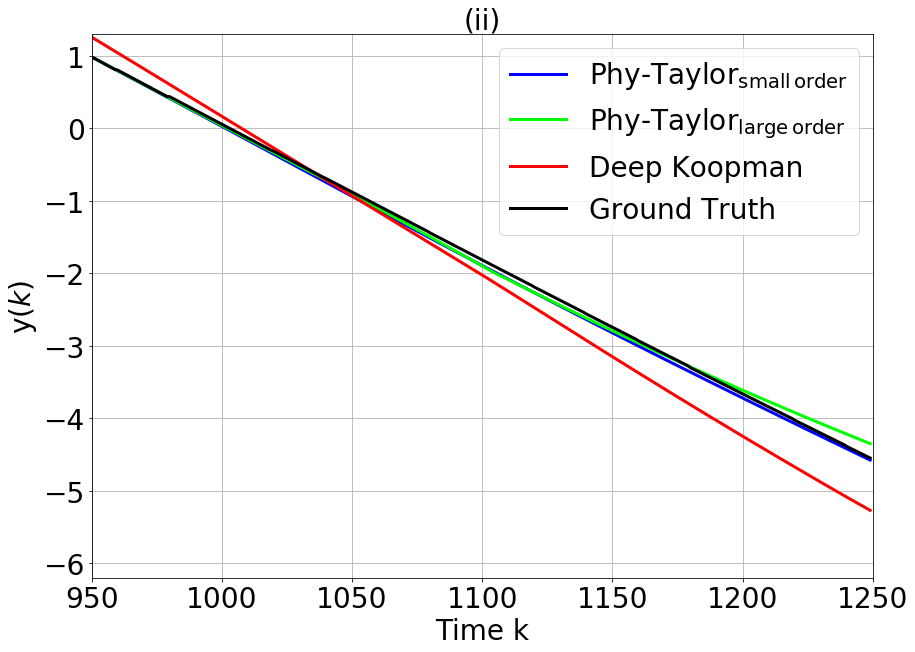

In [36]:
plt.figure(figsize= (14, 10))
plt.plot(t, VVcY2, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{small \, order}}$', color='blue')
plt.plot(t, VVdY2, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{large \, order}}$', color='lime')
plt.plot(t, dkY2, linewidth=3, label = "Deep Koopman", color='red')
plt.plot(t, Y2_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=28)
plt.ylabel(r'$\mathrm{y}(k)$', fontsize=28)
plt.title("(ii)", fontsize=28)
plt.legend()
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.rc('legend',fontsize=28) 
plt.grid()
plt.xlim([950, 1250])
plt.ylim([-6.2, 1.3])
plt.savefig('om2.pdf')  
plt.show()

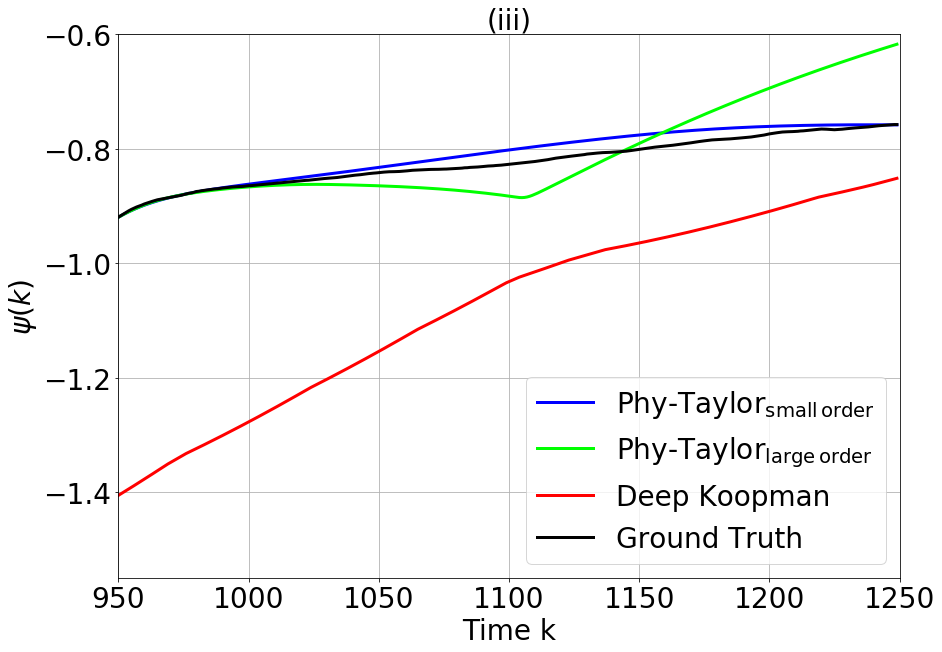

In [37]:
plt.figure(figsize= (14, 10))
plt.plot(t, VVcY3, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{small \, order}}$', color='blue')
plt.plot(t, VVdY3, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{large \, order}}$', color='lime')
plt.plot(t, dkY3, linewidth=3, label = "Deep Koopman", color='red')
plt.plot(t, Y3_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=28)
plt.ylabel(r'$\psi(k)$', fontsize=28)
plt.title("(iii)", fontsize=28)
plt.legend()
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.rc('legend',fontsize=28) 
plt.grid()
plt.xlim([950, 1250])
plt.ylim([-1.55, -0.6])
plt.savefig('om3.pdf') 
plt.show()

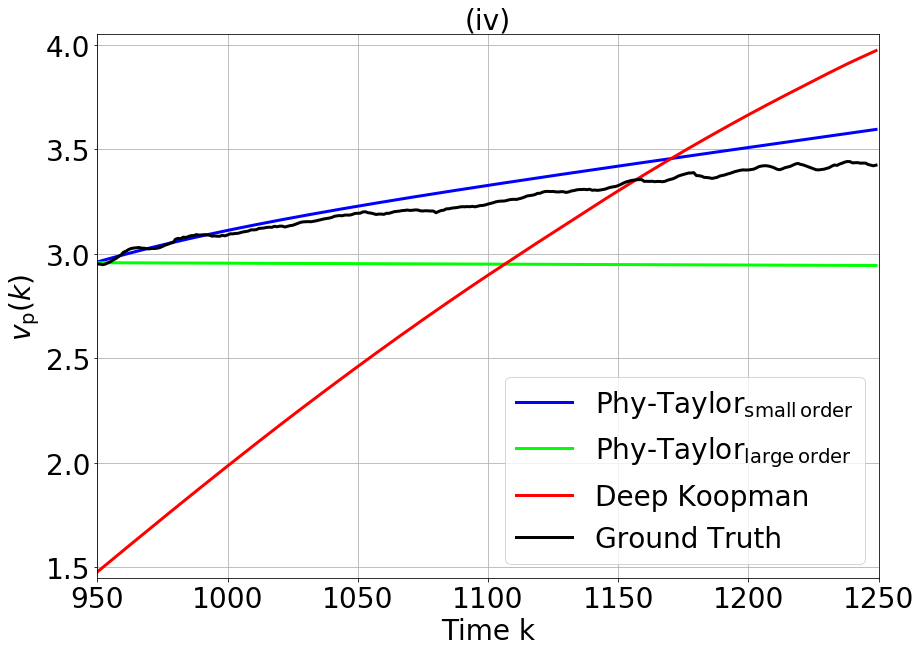

In [38]:
plt.figure(figsize= (14, 10))
plt.plot(t, VVcY4, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{small \, order}}$', color='blue')
plt.plot(t, VVdY4, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{large \, order}}$', color='lime')
plt.plot(t, dkY4, linewidth=3, label = "Deep Koopman", color='red')
plt.plot(t, Y4_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=28)
plt.ylabel(r'$v_{\mathrm{p}}(k)$', fontsize=28)
plt.title("(iv)", fontsize=28)
plt.legend()
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.rc('legend',fontsize=28) 
plt.grid()
plt.xlim([950, 1250])
plt.ylim([1.45, 4.05])
plt.savefig('om4.pdf') 
plt.show()

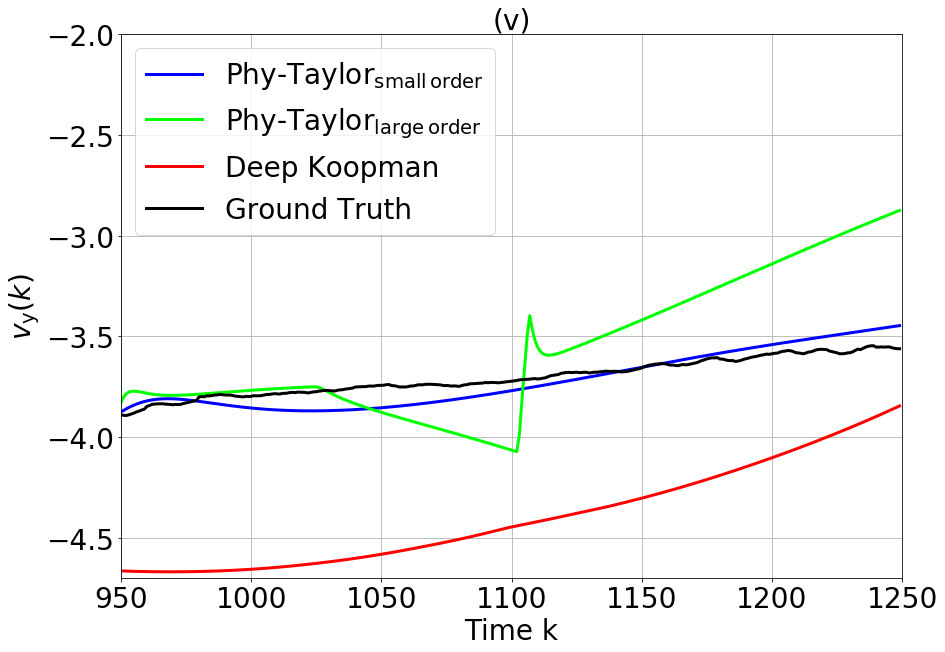

In [39]:
plt.figure(figsize= (14, 10))
plt.plot(t, VVcY5, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{small \, order}}$', color='blue')
plt.plot(t, VVdY5, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{large \, order}}$', color='lime')
plt.plot(t, dkY5, linewidth=3, label = "Deep Koopman", color='red')
plt.plot(t, Y5_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=28)
plt.ylabel(r'$v_{\mathrm{y}}(k)$', fontsize=28)
plt.title("(v)", fontsize=28)
plt.legend()
plt.grid()
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.rc('legend',fontsize=28) 
plt.xlim([950, 1250])
plt.ylim([-4.7, -2.0])
plt.savefig('om5.pdf') 
plt.show()

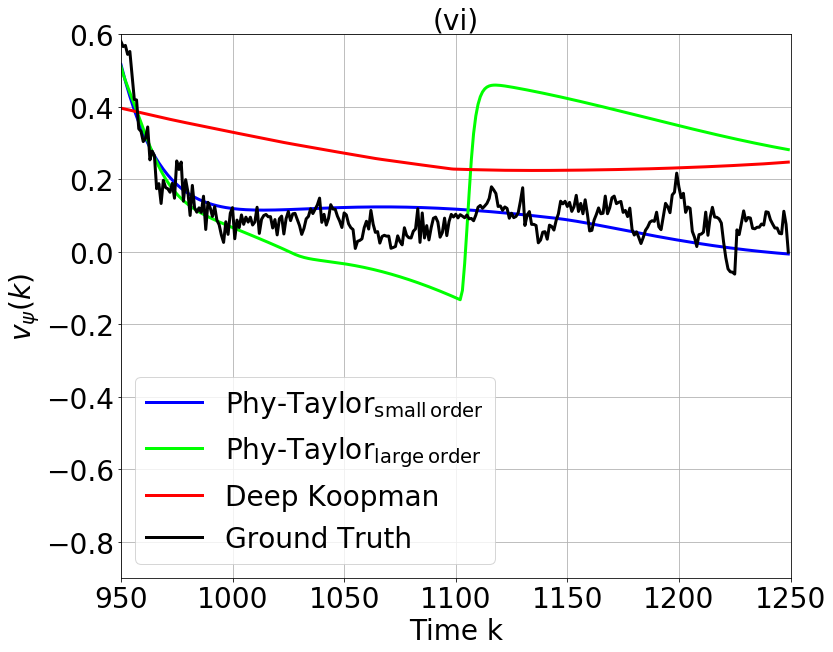

In [34]:
plt.figure(figsize= (14, 10))
plt.plot(t, VVcY6, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{small \, order}}$', color='blue')
plt.plot(t, VVdY6, linewidth=3, label = r'$\mathrm{Phy}$-$\mathrm{Taylor}_{\mathrm{large \, order}}$', color='lime')
plt.plot(t, dkY6, linewidth=3, label = "Deep Koopman", color='red')
plt.plot(t, Y6_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=28)
plt.ylabel(r'$v_{\psi}(k)$', fontsize=28)
plt.title("(vi)", fontsize=28)
plt.legend()
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.rc('legend',fontsize=28) 
plt.grid()
plt.xlim([950, 1250])
plt.ylim([-0.9, 0.6])
plt.savefig('om6.pdf') 
plt.show()

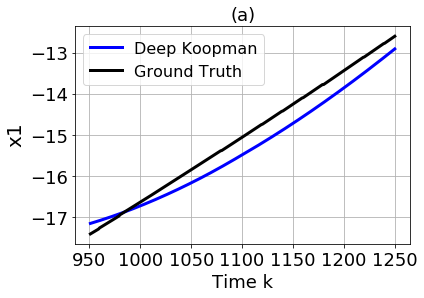

In [163]:
plt.plot(t, dkY1, linewidth=3, label = "Deep Koopman", color='blue')
plt.plot(t, Y1_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$\mathrm{x}1$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("(a)", fontsize=18)
plt.legend()
plt.rc('legend',fontsize=18) 
plt.grid()
#plt.xlim([950, 1250])
#plt.ylim([-17.5, -8])
plt.show()




#fig.savefig(image_name, format=image_format, dpi=1200)


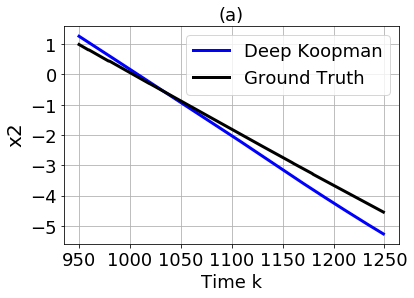

In [50]:
plt.plot(t, dkY2, linewidth=3, label = "Deep Koopman", color='blue')
plt.plot(t, Y2_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$\mathrm{x}2$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("(a)", fontsize=18)
plt.legend()
plt.rc('legend',fontsize=18) 
plt.grid()
#plt.xlim([950, 1250])
#plt.ylim([-17.5, -8])
plt.show()

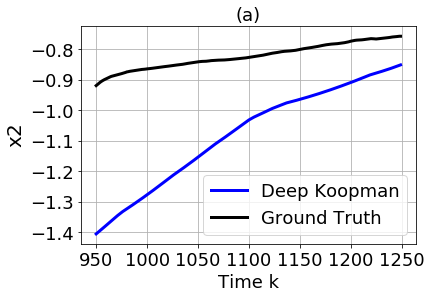

In [51]:
plt.plot(t, dkY3, linewidth=3, label = "Deep Koopman", color='blue')
plt.plot(t, Y3_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$\mathrm{x}2$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("(a)", fontsize=18)
plt.legend()
plt.rc('legend',fontsize=18) 
plt.grid()
#plt.xlim([950, 1250])
#plt.ylim([-17.5, -8])
plt.show()

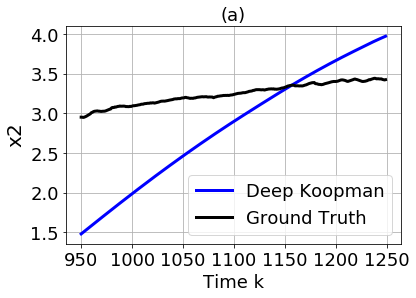

In [44]:
plt.plot(t, dkY4, linewidth=3, label = "Deep Koopman", color='blue')
plt.plot(t, Y4_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$\mathrm{x}2$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("(a)", fontsize=18)
plt.legend()
plt.rc('legend',fontsize=18) 
plt.grid()
#plt.xlim([950, 1250])
#plt.ylim([-17.5, -8])
plt.show()

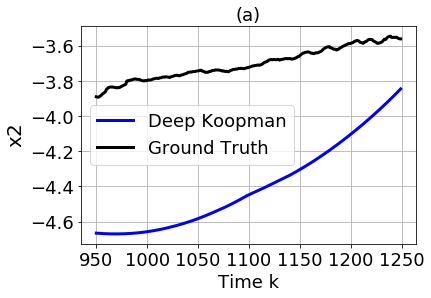

In [45]:
plt.plot(t, dkY5, linewidth=3, label = "Deep Koopman", color='blue')
plt.plot(t, Y5_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$\mathrm{x}2$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("(a)", fontsize=18)
plt.legend()
plt.rc('legend',fontsize=18) 
plt.grid()
#plt.xlim([950, 1250])
#plt.ylim([-17.5, -8])
plt.show()

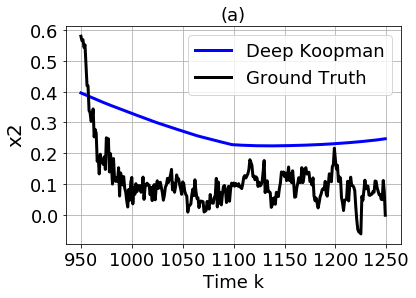

In [46]:
plt.plot(t, dkY6, linewidth=3, label = "Deep Koopman", color='blue')
plt.plot(t, Y6_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$\mathrm{x}2$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("(a)", fontsize=18)
plt.legend()
plt.rc('legend',fontsize=18) 
plt.grid()
#plt.xlim([950, 1250])
#plt.ylim([-17.5, -8])
plt.show()

In [126]:
print(Y6_com) 

[ 0.58009875  0.56586857  0.56903571  0.54431494  0.55227332  0.48758957
  0.41993041  0.41858921  0.33886177  0.33185698  0.30366397  0.31275364
  0.34406542  0.25319009  0.27738603  0.26505621  0.17368489  0.18762209
  0.13287159  0.19694462  0.17679358  0.17349441  0.16382526  0.18850641
  0.14738172  0.25026533  0.2267743   0.24721478  0.13925671  0.19866491
  0.16533512  0.09983875  0.18279677  0.12086743  0.10879199  0.12090832
  0.10832806  0.15298085  0.06113138  0.13610074  0.12094473  0.09702597
  0.12427852  0.08702833  0.07423338  0.04588302  0.02543694  0.08241316
  0.04767035  0.10599125  0.1214231   0.03552339  0.08708464  0.06651867
  0.10131008  0.07536176  0.09508218  0.08150509  0.09498984  0.07346898
  0.08164519  0.12254129  0.05026922  0.08920087  0.09964466  0.10265946
  0.09622993  0.09667392  0.06522938  0.0884991   0.04617137  0.09072676
  0.09807001  0.04872403  0.0910208   0.110688    0.08555238  0.10425362
  0.10565482  0.08848707  0.07219883  0.04757322  0

In [23]:
test_error =  (np.mean(np.square(dkY1 - Y1_com)) + np.mean(np.square(dkY2 - Y2_com)) + np.mean(np.square(dkY3 - Y3_com)) + np.mean(np.square(dkY4 - Y4_com)) + np.mean(np.square(dkY5 - Y5_com)) + np.mean(np.square(dkY6 - Y6_com)))/6

In [24]:
print(test_error)

1.1912977581759836


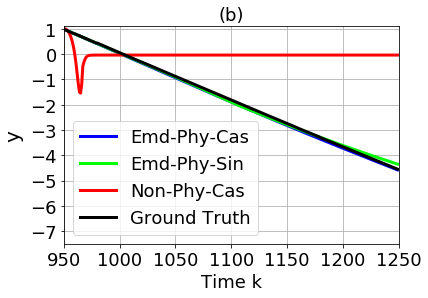

In [116]:
plt.plot(t, VVcY2, linewidth=3, label = "Emd-Phy-Cas", color='blue')
plt.plot(t, VVdY2, linewidth=3, label = "Emd-Phy-Sin", color='lime')
plt.plot(t, VVaY2, linewidth=3, label = "Non-Phy-Cas", color='red')
plt.plot(t, Y2_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$\mathrm{y}$', fontsize=20)
plt.title("(b)", fontsize=18)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('legend',fontsize=18) 
plt.grid()
plt.xlim([950, 1250])
plt.ylim([-7.5, 1.1])
plt.show()

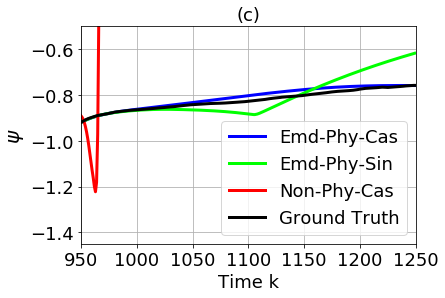

In [117]:
plt.plot(t, VVcY3, linewidth=3, label = "Emd-Phy-Cas", color='blue')
plt.plot(t, VVdY3, linewidth=3, label = "Emd-Phy-Sin", color='lime')
plt.plot(t, VVaY3, linewidth=3, label = "Non-Phy-Cas", color='red')
plt.plot(t, Y3_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$\psi$', fontsize=20)
plt.title("(c)", fontsize=18)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('legend',fontsize=18) 
plt.grid()
plt.xlim([950, 1250])
plt.ylim([-1.45, -0.5])
plt.show()

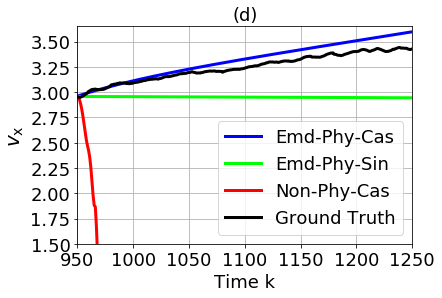

In [118]:
plt.plot(t, VVcY4, linewidth=3, label = "Emd-Phy-Cas", color='blue')
plt.plot(t, VVdY4, linewidth=3, label = "Emd-Phy-Sin", color='lime')
plt.plot(t, VVaY4, linewidth=3, label = "Non-Phy-Cas", color='red')
plt.plot(t, Y4_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$v_{\mathrm{x}}$', fontsize=20)
plt.title("(d)", fontsize=18)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('legend',fontsize=18) 
plt.grid()
plt.xlim([950, 1250])
plt.ylim([1.5, 3.65])
plt.show()

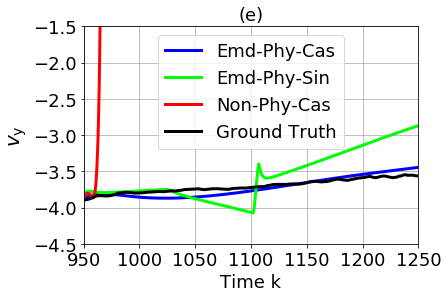

In [119]:
plt.plot(t, VVcY5, linewidth=3, label = "Emd-Phy-Cas", color='blue')
plt.plot(t, VVdY5, linewidth=3, label = "Emd-Phy-Sin", color='lime')
plt.plot(t, VVaY5, linewidth=3, label = "Non-Phy-Cas", color='red')
plt.plot(t, Y5_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$v_{\mathrm{y}}$', fontsize=20)
plt.title("(e)", fontsize=18)
plt.legend()
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('legend',fontsize=18) 
plt.xlim([950, 1250])
plt.ylim([-4.5, -1.5])
plt.show()

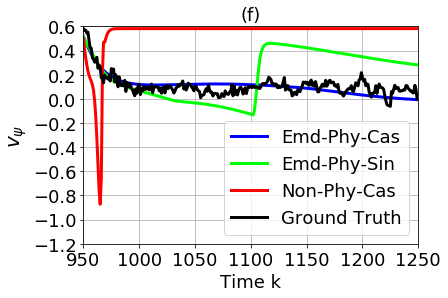

In [120]:
plt.plot(t, VVcY6, linewidth=3, label = "Emd-Phy-Cas", color='blue')
plt.plot(t, VVdY6, linewidth=3, label = "Emd-Phy-Sin", color='lime')
plt.plot(t, VVaY6, linewidth=3, label = "Non-Phy-Cas", color='red')
plt.plot(t, Y6_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$v_{\psi}$', fontsize=20)
plt.title("(f)", fontsize=18)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('legend',fontsize=18) 
plt.grid()
plt.xlim([950, 1250])
plt.ylim([-1.2, 0.6])
plt.show()

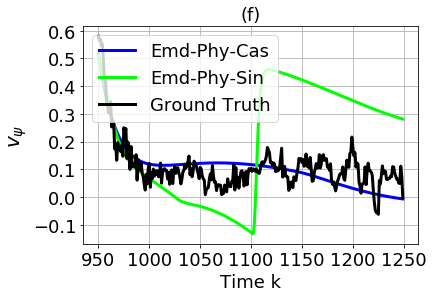

In [11]:
plt.plot(t, VVcY6, linewidth=3, label = "Emd-Phy-Cas", color='blue')
plt.plot(t, Y6_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$v_{\psi}$', fontsize=20)
plt.title("(f)", fontsize=18)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('legend',fontsize=18) 
plt.grid()
plt.show()

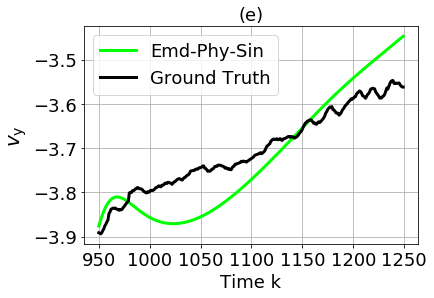

In [14]:
plt.plot(t, VVcY5, linewidth=3, label = "Emd-Phy-Sin", color='lime')
plt.plot(t, Y5_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$v_{\mathrm{y}}$', fontsize=20)
plt.title("(e)", fontsize=18)
plt.legend()
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('legend',fontsize=18) 
plt.show()

In [ ]:
plt.plot(t, VVcY4, linewidth=3, label = "Emd-Phy-Cas", color='blue')
plt.plot(t, VVdY4, linewidth=3, label = "Emd-Phy-Sin", color='lime')
plt.plot(t, VVaY4, linewidth=3, label = "Non-Phy-Cas", color='red')
plt.plot(t, Y4_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$v_{\mathrm{x}}$', fontsize=20)
plt.title("(d)", fontsize=18)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('legend',fontsize=18) 
plt.grid()
plt.xlim([950, 1250])
plt.ylim([1.5, 3.65])
plt.show()